# Data Cleaning and Pre-processing 

 We will be first checking for basic discrepancies in the data like --
 
       1.Missing Data 
       2. Reasons for missing data 
       3.Dropping or filling missing values 
       4. Data types 
       5.Outlier problems etc 
  

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the data into the notebook

In [5]:
book_tags = pd.read_csv("/Users/sharathg/Desktop/DataSets/goodbooks-10k/book_tags.csv")
books = pd.read_csv('/Users/sharathg/Desktop/DataSets/goodbooks-10k/books.csv',encoding ='latin-1')
Uni_usr_rtg = pd.read_csv('/Users/sharathg/Desktop/DataSets/goodbooks-10k/Uni_Usr_rtg')
Uni_avg_rtg = pd.read_csv('/Users/sharathg/Desktop/DataSets/goodbooks-10k/Uniq_Avg_rtg')
tags_books =pd.read_csv("/Users/sharathg/Desktop/DataSets/goodbooks-10k/tags.csv")
to_read = pd.read_csv("/Users/sharathg/Desktop/DataSets/goodbooks-10k/to_read.csv")

# We take a look at all the dataframes to get an idea for further analysis.




In [6]:
to_read.head(4)

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198


In [232]:
Uni_avg_rtg

,book_id,avg_rating_on_book
1,1,4.240000
2,2,4.210000
3,3,3.090000
4,4,4.460000
5,5,3.890000
6,6,4.090000
7,7,3.920000
8,8,3.830000
9,9,3.350000
10,10,4.180000


In [37]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [38]:
Uni_usr_rtg.head()

,user_id,book_id,rating,avg_rtng_by_user
1,1,6285,4,3.666667
2,1,1180,4,3.666667
3,1,4893,3,3.666667
4,2,8855,5,4.333333
5,2,9762,4,4.333333


In [6]:
Uni_avg_rtg.head()

,book_id,avg_rating_on_book
1,1,4.24
2,2,4.21
3,3,3.09
4,4,4.46
5,5,3.89


In [7]:
tags_books.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
book_tags.sample(5)

,goodreads_book_id,tag_id,count
777452,10803121,25150,29
34556,4656,15392,5
250424,46460,11557,22
718553,7824768,34031,2
283207,62212,5207,61


In [9]:
len(tags_books.tag_name.unique())


34252

# Starting with the 'books' dataset

In [103]:
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÌ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## The most loved book in the top 10,000 rated books on Goodreads.com is --##
                            ## The Hunger Games by Suzanne Collins ! ##
                            
                            
### Below is the list of the top 10 rated books on goodreads.com ###                            
                            

In [104]:
books.sort_values('ratings_count',ascending = False)[:11]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÌ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780000e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780000e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780000e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
9,10,1885,1885,3060926,3455,679783261,9.780000e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
8,9,960,960,3338963,311,1416524797,9.780000e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...


### Analysisng on what time these classics were written to  get an insight 

In [41]:
len(books.isbn13.unique())

14

### Since there are only 14 unique ISBN13 values , there is no point using this column and hence we drop it ###
   #### Similarly we are not using the image urls nor the small image urls and hence we drop them too . 

In [7]:
books.drop(['isbn13','image_url','small_image_url'],axis = 1,inplace = True)


In [151]:
len(books.columns)

20

In [107]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
id                           10000 non-null int64
book_id                      10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 non-null int64
ratings_3                    10000 no

In [136]:
books.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
authors                       object
original_publication_year      int64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
dtype: object

In [137]:
books.shape

(10000, 20)

### Filling out the null values with 0 , because we will be rooting out the values later . 

In [138]:
books.original_publication_year=books.original_publication_year.fillna(0)

In [139]:
books.original_publication_year=books.original_publication_year.astype('int')

In [8]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPrÌ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


### We select the unique language values and then bucket them into similar groups ,so that further analysis is easy    since there are many languages . 

In [9]:
(books.language_code.unique())

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur', 'dan',
       'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'], dtype=object)

In [10]:
books.language_code = books.language_code.replace(to_replace={'en-US','en-CA','en','en-GB','engg','enggg','eng'},value= 'en',regex =True)

In [11]:
books.language_code = books.language_code.replace(to_replace={'fre','por','nor','pol','dan','ita','rum','ger',
                                                              'spa','rus','swe','nl'}
                                                  ,value= 'eur',regex =True)

In [12]:
books.language_code = books.language_code.replace(to_replace={'vie','jpn','fil','mul','ind'},value= 'asn',regex =True)

In [13]:
books.language_code = books.language_code.replace(to_replace={'tur','per','ara'},value= 'md-e',regex =True)

In [30]:
# After bucketting the data set , unique values left are shown below .

In [14]:
books.language_code.value_counts()

en      8730
eur       82
md-e      72
asn       32
Name: language_code, dtype: int64

## The distribution of the various languages in the top 10,000 rated books on GoodReads.com

In [147]:
len(books.language_code)

10000

In [148]:
import matplotlib.pyplot as plt 
import matplotlib

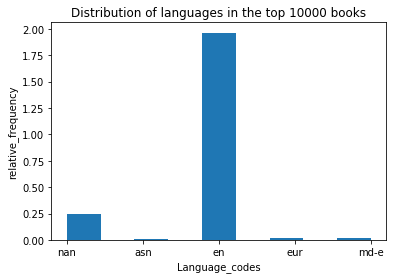

In [149]:
num_bins =9
fig ,ax =plt.subplots()
n,bins,patch=ax.hist(books.language_code,num_bins,density = 1 )
ax.set_xlabel('Language_codes')
ax.set_ylabel('relative_frequency')
ax.set_title('Distribution of languages in the top 10000 books')
plt.show()

## This shows that most of the books are in English , close to 98% of them are in English 

##  pie chart to show the distribution of languages

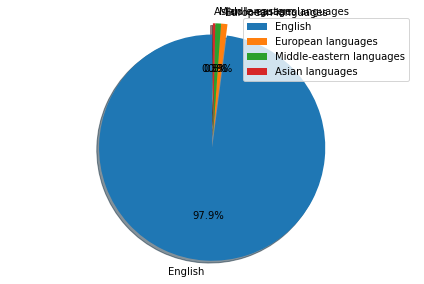

In [15]:
labels='English','European languages','Middle-eastern languages','Asian languages'
l_dist= [87.3,0.82,0.72,0.3]
explode = (0.1,0,0,0)
fig1,ax1 = plt.subplots()
ax1.pie(l_dist,labels = labels ,explode = explode ,autopct='%1.1f%%',shadow =True , startangle = 90)
ax1.axis('equal')
ax1.legend(labels)
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

###  We need to see the relation between the total ratings and total text ratings , this will help us understand the ratio of committment , since it is easier to rate a book than to review it . 


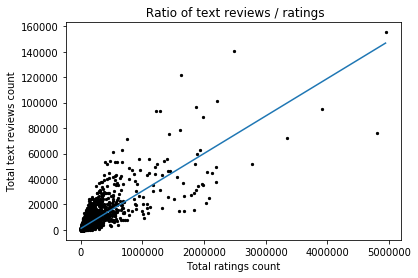

In [219]:
plt.scatter(books.work_ratings_count,books.work_text_reviews_count,s=5,color = 'black')
plt.xlabel('Total ratings count')
plt.ylabel('Total text reviews count')
plt.title(' Ratio of text reviews / ratings')
plt.plot(np.unique(books.work_ratings_count), np.poly1d(np.polyfit(books.work_ratings_count,
                     books.work_text_reviews_count, 1)) (np.unique(books.work_ratings_count)))



### From the regression coefficients we can infer that for every 100 people who rate , 3 people review a book. 

In [221]:
l =(np.polyfit(books.work_ratings_count,books.work_text_reviews_count, 1))
l

array([  2.94536168e-02,   1.16194780e+03])

In [222]:
books.head(4)

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",en,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPrÌ©",1997,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,en,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,Stephenie Meyer,2005,Twilight,"Twilight (Twilight, #1)",en,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,Harper Lee,1960,To Kill a Mockingbird,To Kill a Mockingbird,en,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267


### Here we have unique values 

### One of the idea is to see the distribution of books according to their first publication year .  Just to see if they have survived the test of time . 

### For this we will be building the scatter plot for year vs rating 

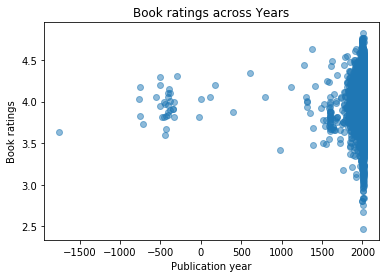

In [16]:
# fig, ax = plt.subplots()
# n = 1000
# x, y = books.original_publication_year,books.average_rating
# scale = 100
# ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

plt.scatter(books.original_publication_year,books.average_rating,alpha =0.5)
plt.xlabel('Publication year')
plt.ylabel('Book ratings')
plt.title('Book ratings across Years')
plt.show()


## All the neagative values correspond to year  BC and positive values in year AD

### From the plot we can vaguley conclude that people have no polar reviews on the books of the past , mostly because the works that have withstood the test of time are generally great works  like 
 ### The Illiad 
 ###  Beowulf 
 ### The Art of war 
 ###  and many more 


### Distribution of average ratings on the top 10000 books on Goodreads.com


In [234]:
Uni_avg_rtg.head(3)

,book_id,avg_rating_on_book
1,1,4.24
2,2,4.21
3,3,3.09


Text(0.5,1,'Average user rating on top 10,000 books')

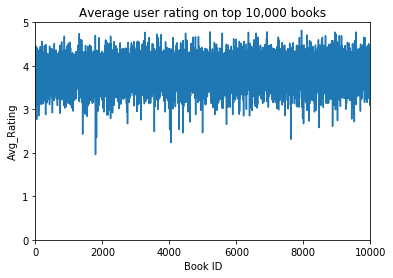

In [238]:
plt.plot(Uni_avg_rtg.book_id,Uni_avg_rtg.avg_rating_on_book)
plt.axis([0,10000,0,5])
plt.xlabel("Book ID")
plt.ylabel('Avg_Rating')
plt.title('Average user rating on top 10,000 books')

### From the plot , we can infer that there are outliers in the data set . 

#### Boxplots to be plotted to find the outliers and weed them out 

### Box Plot of Avg. ratings on top 10000 books

Text(0.5,1,'Box Plot of Avg. ratings on top 10000 books')

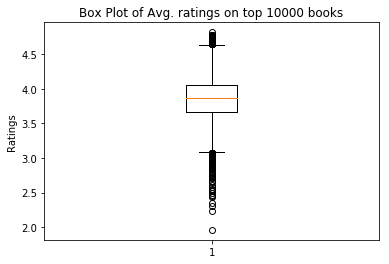

In [252]:
from matplotlib.patches import Polygon 
# fig,axs = plt.subplots(2,3)
plt.boxplot(Uni_avg_rtg.avg_rating_on_book,whis =1.5)
plt.ylabel('Ratings')
plt.title('Box Plot of Avg. ratings on top 10000 books')

### The box plot after getting rid of the outliers . 

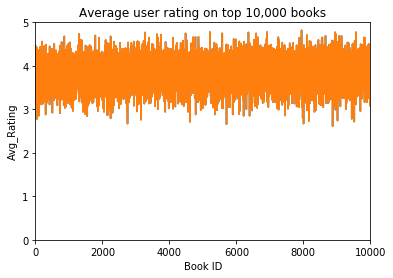

In [29]:
Uni_avg_rtg = Uni_avg_rtg.loc[Uni_avg_rtg.avg_rating_on_book >2.6 ]       
plt.plot(Uni_avg_rtg.book_id,Uni_avg_rtg.avg_rating_on_book)
plt.axis([0,10000,0,5])
plt.xlabel("Book ID")
plt.ylabel('Avg_Rating')
plt.title('Average user rating on top 10,000 books')
plt.show()

### Box Plot of Avg. ratings on books  by the 53,500 users

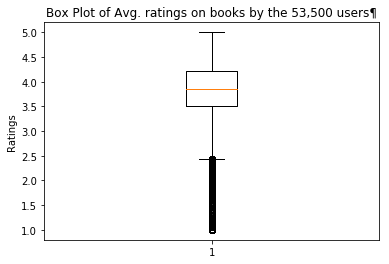

In [20]:
plt.boxplot(Uni_usr_rtg.avg_rtng_by_user,whis =1.5)
plt.ylabel('Ratings')
plt.title('Box Plot of Avg. ratings on books by the 53,500 users¶')
plt.show()


### Now looking at the plot we see that there are many outliers who have ratings less than 2.5  

In [25]:
## Outlier treatment to be started . 
Uni_usr_rtg = Uni_usr_rtg.loc[Uni_usr_rtg.avg_rtng_by_user>=2.5]
Uni_usr_rtg.head(5)

,user_id,book_id,rating,avg_rtng_by_user
1,1,6285,4,3.666667
2,1,1180,4,3.666667
3,1,4893,3,3.666667
4,2,8855,5,4.333333
5,2,9762,4,4.333333


### After the treatment the boxplot to be plotted . 

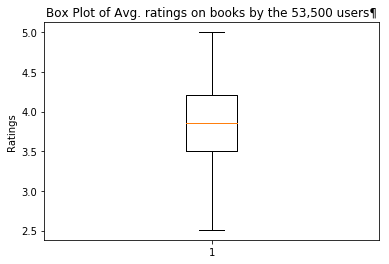

In [26]:
plt.boxplot(Uni_usr_rtg.avg_rtng_by_user)
plt.ylabel('Ratings')
plt.title('Box Plot of Avg. ratings on books by the 53,500 users¶')
plt.show()

### After further analysis we find that , 


### This tells us about the books published before 1500 AD , hence this will include 

In [178]:
books.loc[books.original_publication_year<1500]

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
78,79,1381,1381,3356006,1703,143039954,"Homer, Robert Fagles, E.V. Rieu, FrÌ©dÌ©ric Mu...",-720,_öë«ììÄìÄëµë_ë±,The Odyssey,en,3.73,670326,710757,8101,29703,65629,183082,224120,208223
219,220,3609760,3609760,3652511,20,316043133,Mark Cotta Vaz,0,Twilight: The Complete Illustrated Movie Compa...,Twilight: The Complete Illustrated Movie Compa...,en,4.23,291411,291899,532,6862,11019,48008,67939,158071
340,341,1371,1371,3293141,1726,140275363,"Homer, Robert Fagles, FrÌ©dÌ©ric Mugler, Berna...",-750,_üëÈë_ëÂìâ,The Iliad,en,3.83,241088,273565,4763,7701,20845,68844,89384,86791
402,403,10534,10534,3200649,1865,1590302257,"Sun Tzu, Thomas Cleary",-500,_Ç_Éµ¾_¥ [SÇnzi bÇngf_],The Art of War,en,3.95,167332,203948,6335,2930,11589,48265,70644,70520
530,531,52357,52357,189503,601,393320979,"Unknown, Seamus Heaney",975,Beowulf,Beowulf,en,3.42,155903,184187,5098,12256,25619,56758,51660,37894
645,646,2696,2696,986234,634,140424385,"Geoffrey Chaucer, Nevill Coghill",1390,Tales of Caunterbury,The Canterbury Tales,en,3.48,148480,158661,2615,6795,19618,52875,48893,30480
771,772,30289,30289,1625515,842,140449140,"Plato, Desmond Lee",-380,ëÊëÀëÈë_ìãëµëøë±,The Republic,en,3.90,110274,122747,2261,2772,7531,29394,42284,40766
823,824,1554,1554,3098166,498,1580495931,"Sophocles, J.E. Thomas",-430,ëÙ_¡ë«ëøìÛëÀìÉìâ ë_ììë±ë_ë_ëÀìâ,"Oedipus Rex (The Theban Plays, #1)",en,3.67,119496,134384,2129,3032,12324,42020,45436,31572
975,976,90072,90072,24501333,3,793551617,"Robert Kapilow, Dr. Seuss",0,NaN,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",NaN,4.44,90574,90691,262,803,1943,10781,20483,56681
976,977,15645,15645,2377563,856,812970063,"Dante Alighieri, Anthony M. Esolen",1320,Inferno,Inferno (The Divine Comedy #1),NaN,3.99,87511,109200,3576,1930,6267,23308,37680,40015


In [164]:
books.original_publication_year.value_counts()

 2012    568
 2011    556
 2013    518
 2010    473
 2014    437
 2009    432
 2008    383
 2007    363
 2006    362
 2005    326
 2004    307
 2015    306
 2003    288
 2001    226
 2002    225
 2000    209
 2016    198
 1999    186
 1998    172
 1997    168
 1996    163
 1995    126
 1994    121
 1993    115
 1992    112
 1990     99
 1991     98
 1988     89
 1989     87
 1987     83
        ... 
 1834      1
 1826      1
 1818      1
-1750      1
 1767      1
 1722      1
 1666      1
 1594      1
 1554      1
 1418      1
-430       1
 1791      1
 1759      1
 180       1
 1591      1
-17        1
 119       1
-401       1
-441       1
 975       1
 1519      1
 1867      1
 1719      1
 1811      1
 1691      1
 1798      1
 1651      1
 1611      1
 1563      1
 1667      1
Name: original_publication_year, Length: 294, dtype: int64

### Drawing heatmaps for the per user rating 

In [173]:
k = books.loc[books.original_publication_year>0]
k.head()

,id,book_id,best_book_id,work_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",en,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,"J.K. Rowling, Mary GrandPrÌ©",1997,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,en,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,Stephenie Meyer,2005,Twilight,"Twilight (Twilight, #1)",en,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,Harper Lee,1960,To Kill a Mockingbird,To Kill a Mockingbird,en,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,F. Scott Fitzgerald,1925,The Great Gatsby,The Great Gatsby,en,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [168]:
Uni_usr_rtg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981756 entries, 1 to 981756
Data columns (total 4 columns):
user_id             981756 non-null int64
book_id             981756 non-null int64
rating              981756 non-null int64
avg_rtng_by_user    981756 non-null float64
dtypes: float64(1), int64(3)
memory usage: 37.5 MB


In [ ]:
books.original_publication_year.astype('int').head()

In [ ]:
books.isbn.astype('int')

In [ ]:
Uni_avg_rtg .sample(5)

## Books dataframe analysis 

In [ ]:
books.isnull().sum()

In [ ]:
##percentage of data that is missing is --
#total cells in the dataframe. 
total_cells = np.product(np.shape(books))
t = total_cells

In [ ]:
#total null or missing values in the data 
k = np.sum(books.isnull().sum())

In [ ]:
##percentage of data that is missing is 
miss = (k/t )*100
miss 

This shows that the dataset is pretty accurate , and not many missing values are there . 



In [ ]:
book_tags.head(4)

In [ ]:
books.shape

In [ ]:
books.sample()

In [ ]:
books.sample(10)

In [ ]:
books.info()

From the info above we identify that the datatypes of some attributes need to be changed like --
    
    Atrribute       correct datatype  present datatype
    1. isbn            int                  object  
    2. isbn13          int                  float
    3.publication year int                  float 
  These will be fixed in the following steps . 
 

In [ ]:
books['language_code'].isnull().sum()

Apparently one cannot change the dtype of an attribute with missing calues in it , so it needs to analysed and proper action needed to be taken like artificial imputation or dropping the row altogether . 
